In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
def ComputeError(ref, result):
    if len(ref) != len(result) :
        print("LENGTH ERROR")
        return -1
    
    return np.sqrt(np.mean(((ref - result) **2)/len(ref))

SyntaxError: unexpected EOF while parsing (<ipython-input-115-1c382df7f80a>, line 6)

errors shape :  (10, 1, 4)


/Users/physilog-home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


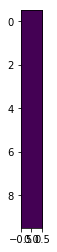

/Users/physilog-home/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/physilog-home/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Users/physilog-home/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/physilog-home/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Users/physilog-home/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/physilog-home/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked eleme

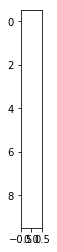

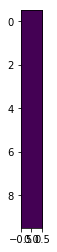

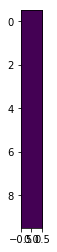

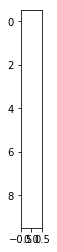

[[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
 min error :  inf
 min error acc cov :  0.0


In [3]:
acc_cov_points = 10
gyr_cov_points = 5

acc_cov_list = np.linspace(0,0.1, acc_cov_points) #(0.01, 0.025, 0.05, 0.1, 0.2)#
gyr_cov_list = np.array([0])#np.linspace(0,10, gyr_cov_points)

#print("acc cov list ", acc_cov_list)

errors = np.zeros([len(acc_cov_list), len(gyr_cov_list), 4])
print("errors shape : ", errors.shape)


for acc_idx in range(len(acc_cov_list)):
    acc_cov = acc_cov_list[acc_idx]
    
    for gyr_idx in range(len(gyr_cov_list)):
        
        gyr_cov = gyr_cov_list[gyr_idx]
        
        #print("running code with args ", acc_cov, gyr_cov)
        
        output = !/Users/physilog-home/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov
        #!/home/val/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov

        reference_output = np.genfromtxt("/Users/physilog-home/Desktop/Sprint Analysis/Files_GaitUp/CSVdata/CL_40_1_orientation.csv", delimiter=",", skip_header=1)
        gareth_output = np.genfromtxt("/Users/physilog-home/Desktop/gareth_output.csv", delimiter=',')

        reference_quat = reference_output[:, 0:4]
        gareth_quat = gareth_output[:, 0:4]

        gareth_bias = gareth_output[:, 4:7]


        for i in range(4):
            errors[acc_idx, gyr_idx, i] = ComputeError(reference_quat[:,i], gareth_quat[:,i])      




#done loop
mean_error= np.mean(errors, axis=2)

for i in range(4):
    plt.imshow(errors[:,:,i])
    plt.show()

plt.imshow(mean_error)
plt.show()

print(mean_error)

min_error = np.min(mean_error)
min_error_index = np.argmin(mean_error)
min_acc_cov = acc_cov_list[min_error_index]

#x_index = min_error_index
print(" min error : ", min_error)
print(" min error acc cov : ", min_acc_cov)




errors shape :  (100, 4)
ERROR PER ELEMENT


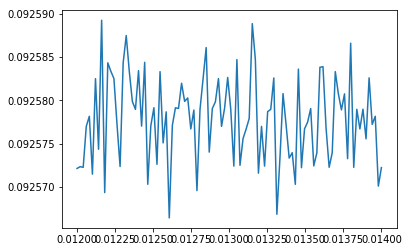

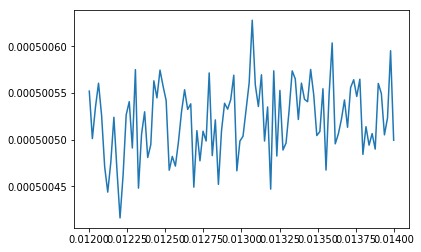

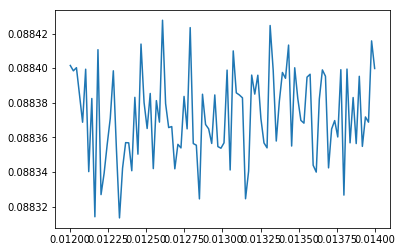

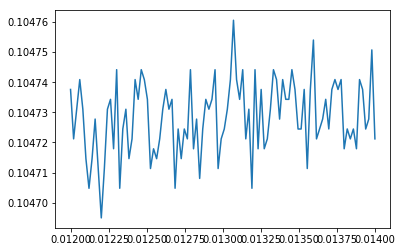

ERROR OVER TIME


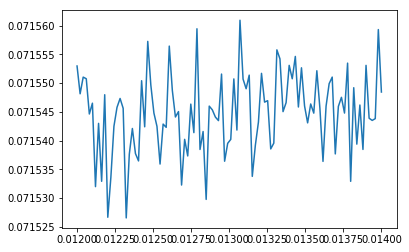

 min error :  0.07152653850315659
 min error acc cov :  0.012323232323232323


In [10]:
acc_cov_points = 100

acc_cov_list = np.linspace(0.012,0.014, acc_cov_points) #(0.01, 0.025, 0.05, 0.1, 0.2)#

gyr_cov = 0

#print("acc cov list ", acc_cov_list)

errors = np.zeros([len(acc_cov_list), 4])
print("errors shape : ", errors.shape)


for acc_idx in range(len(acc_cov_list)):
    acc_cov = acc_cov_list[acc_idx]
    
        
    #print("running code with args ", acc_cov, gyr_cov)

    output = !/Users/physilog-home/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov
    #!/home/val/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov

    reference_output = np.genfromtxt("/Users/physilog-home/Desktop/Sprint Analysis/Files_GaitUp/CSVdata/CL_40_1_orientation.csv", delimiter=",", skip_header=1)
    gareth_output = np.genfromtxt("/Users/physilog-home/Desktop/gareth_output.csv", delimiter=',')

    reference_quat = reference_output[:, 0:4]
    gareth_quat = gareth_output[:, 0:4]
    
    final_gareth_quat = gareth_quat.copy()
    
    #axes transform
    final_gareth_quat[:,0] = -gareth_quat[:,3]
    final_gareth_quat[:,1] = -gareth_quat[:,2]
    final_gareth_quat[:,2] = gareth_quat[:,1]
    final_gareth_quat[:,3] = gareth_quat[:,0]


    gareth_bias = gareth_output[:, 4:7]


    for i in range(4):
        errors[acc_idx, i] = ComputeError(reference_quat[:,i], final_gareth_quat[:,i])      




#done loop
mean_error= np.mean(errors, axis=1)

print("ERROR PER ELEMENT")
for i in range(4):
    plt.plot(acc_cov_list, errors[:,i])
    plt.show()

print("ERROR OVER TIME")
plt.plot(acc_cov_list, mean_error)
plt.show()

min_error = np.min(mean_error)
min_error_index = np.argmin(mean_error)
min_acc_cov = acc_cov_list[min_error_index]

#x_index = min_error_index
print(" min error : ", min_error)
print(" min error acc cov : ", min_acc_cov)



------------------------------------------------------------------------
acc cov factor : 0.012
gyr cov factor : 0
acc noise : 0.000144
gyr noise : 0
init success
running filter on data
DONE !
final quat : (0.642708, 0.000708464, 0.763706, -0.0606526)
------------------------------------------------------------------------


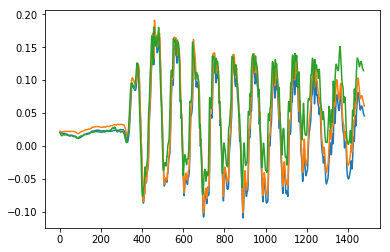

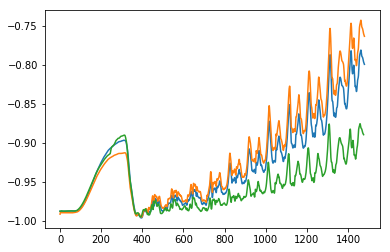

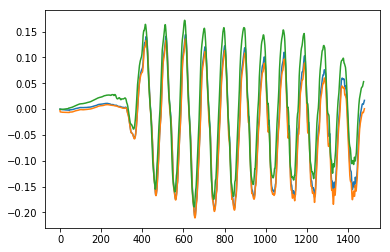

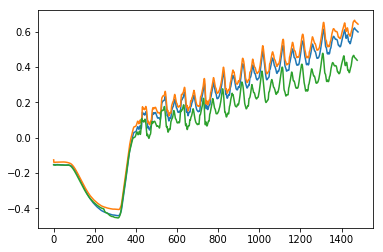

In [137]:
acc_cov = 0.012
gyr_cov = 0.0

!/Users/physilog-home/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov


reference_output = np.genfromtxt("/Users/physilog-home/Desktop/Sprint Analysis/Files_GaitUp/CSVdata/CL_40_1_orientation.csv", delimiter=",", skip_header=1)
gareth_output = np.genfromtxt("/Users/physilog-home/Desktop/gareth_output.csv", delimiter=',')
gaithub_output = np.genfromtxt("/Users/physilog-home/Desktop/sprint_rotated_acc.csv", delimiter=',')

reference_quat = reference_output[:, 0:4]
gareth_quat = gareth_output[:, 0:4]
gaithub_quat = gaithub_output[:, 0:4]


final_gareth_quat = gareth_quat.copy()
final_gaithub_quat = gaithub_quat.copy()
    
#axes transform
final_gareth_quat[:,0] = -gareth_quat[:,3]
final_gareth_quat[:,1] = -gareth_quat[:,2]
final_gareth_quat[:,2] = gareth_quat[:,1]
final_gareth_quat[:,3] = gareth_quat[:,0]

final_gaithub_quat[:,0] = -gaithub_quat[:,0]
final_gaithub_quat[:,1] = -gaithub_quat[:,2]
final_gaithub_quat[:,2] = gaithub_quat[:,1]
final_gaithub_quat[:,3] = gaithub_quat[:,0]


for i in range(4):
    #plt.plot(gareth_quat[:,i])
    plt.plot(reference_quat[:,i])
    plt.plot(final_gareth_quat[:,i])
    plt.plot(gaithub_quat[:,i])
    plt.show()
    
#for i in range(3):
    #plt.plot(gareth_bias[:,i])
    #plt.show()

In [138]:

gaithub_output = np.genfromtxt("/Users/physilog-home/Desktop/gaithub_output.csv", delimiter=',')
reference_output = np.genfromtxt("/Users/physilog-home/Desktop/Sprint Analysis/Files_GaitUp/CSVdata/CL_60_1_orientation.csv", delimiter=",", skip_header=1)
gaithub_acc_update = np.genfromtxt("/Users/physilog-home/Desktop/acc_update.csv", delimiter=',')

start_index = 5
end_index = 1000

reference_quat = reference_output[start_index:end_index, 0:4]
gaithub_quat = gaithub_output[start_index:end_index,0:4]

reference_euler = reference_output[start_index:end_index,4:7]
gaithub_euler = gaithub_output[start_index:end_index,4:7]

reference_rotated_acc = reference_output[start_index:end_index, 7:10]
gaithub_rotated_acc = gaithub_output[start_index:end_index, 7:10]

reference_acc_update = reference_output[start_index:end_index,10]
gaithub_acc_update = gaithub_acc_update[start_index:end_index]
reference_acc_update = reference_acc_update[0:len(gaithub_acc_update)]


print("SPRINT ACC")    
plt.plot(reference_acc_update)
plt.plot(gaithub_acc_update)
plt.show()
print("SPRINT ACC X ERROR : ", ComputeError(reference_acc_update, gaithub_acc_update))


print("BLUE = REF; ORANGE = GH")
print("QUATERNIONS")
for i in range(4):
    plt.plot(reference_quat[:,i])
    plt.plot(gaithub_quat[:,i])
    plt.show()
    

print("EULER ANGLES")
for i in range(3):
    plt.plot(reference_euler[:,i])
    plt.plot(gaithub_euler[:,i])
    plt.show()
    
print("ROTATED ACC")
for i in range(3):
    plt.plot(reference_rotated_acc[:,i])
    plt.plot(gaithub_rotated_acc[:,i])
    plt.show()



OSError: /Users/physilog-home/Desktop/Sprint Analysis/Files_GaitUp/CSVdata/CL_60_1_orientation.csv not found.

len ref :  1432
len gh  :  1119
FILTERED SPEED


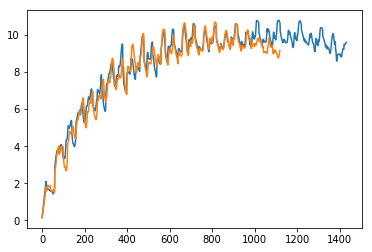

DISTANCE


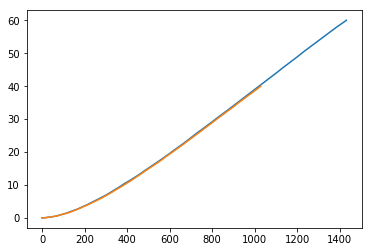

SPRINT PROFILE


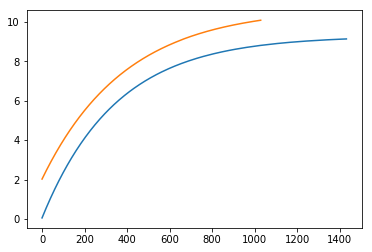

In [135]:
start_index = 0
end_index = -1

reference_output = np.genfromtxt("/Users/physilog-home/Desktop/Sprint Analysis/Files_GaitUp/CSVdata/CL_60_1_results.csv", delimiter=",", skip_header=1)[start_index:end_index]
reference_sprint_speed = reference_output[:,6]
reference_sprint_distance = reference_output[:,21]
reference_sprint_profile = reference_output[:,9]

gaithub_sprint_speed = np.genfromtxt("/Users/physilog-home/Desktop/sprint_speed.csv", delimiter=',')[start_index:end_index]
gaithub_distance = np.genfromtxt("/Users/physilog-home/Desktop/distance.csv", delimiter=',')[start_index:end_index]
gaithub_sprint_profile = np.genfromtxt("/Users/physilog-home/Desktop/sprint_profile.csv", delimiter=',')[start_index:end_index]


print("len ref : ", len(reference_sprint_speed))
print("len gh  : ", len(gaithub_sprint_speed))

print("FILTERED SPEED")
plt.plot(reference_sprint_speed)
plt.plot(gaithub_sprint_speed)
plt.show()

print("DISTANCE")
plt.plot(reference_sprint_distance)
plt.plot(gaithub_distance)
plt.show()

print("SPRINT PROFILE")
plt.plot(reference_sprint_profile)
plt.plot(gaithub_sprint_profile)
plt.show()